<h1 style="text-align:center">Advanced Statistical Inference</h1>
<h1 style="text-align:center">Clustering</h1>

## 1. Aims
<div class="alert alert-info"> 
To implement $k$-means and use it to cluster some data.
</div>

In [5]:
import scipy.io
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('kmeansdata.mat')

(100, 2)


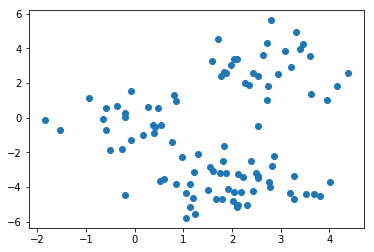

In [11]:
X = mat['X']
print(X.shape)

plt.scatter(X[:,0],X[:,1])

## 2. Implement the $k$-means algorithm covered in the lecture (not the kernelised version)

<div class="alert alert-info">

Hints:
<br>
<ul> 
<li> Your code needs to alternate between assigning points to the cluster that theyâ€™re closest to and recalculating the means by taking the average of these points.
<li> You may need to add something to your code to deal with the problem of no points being assigned to a particular cluster â€“ set the mean randomly.
<li> Youâ€™ll find it easiest to maintain a variable that indicates which cluster each point is assigned to. Be careful not to assign a point to more than one cluster.
<li> Your algorithm should converge in fewer than 20 steps (or thereabouts). If it takes 100, something isnâ€™t right!
</ul>

</div>

In [18]:
'''

DEFINE HELPER FUNCTIONS

'''
def assignment(data,centroids):
    distances = pairwise_distances(data,centroids,metric='sqeuclidean')
    cluster_assignment = np.argmin(distances, axis = 1)
    return cluster_assignment

def update(assignments,data,k):
    new_centroids = np.empty((k,2))
    for i in range(k):
        new_centroids[i] = np.mean(data[assignments == i],axis = 0)
        
    return new_centroids


In [30]:
def kmeans(data,maxitr, k=2, centroids=None):
    if centroids == None:
        rand_indices = np.random.randint(len(data), size=k)
        centroids = np.array(data[rand_indices])
    
    for i in range(maxitr):
        assignments = assignment(data,centroids)
        new_centroids = update(assignments,data,k)
        
        centroids = new_centroids
        
    return centroids,assignments

centroids , assignments = kmeans(X,20)
print(X[assignments == 0])

[[ 0.54113941 -0.40987265]
 [-0.20314279  0.06144548]
 [ 0.38302391 -0.39833312]
 [ 0.41203538 -0.54354812]
 [-0.36378075  0.65269859]
 [-0.58958899  0.54063309]
 [ 0.85354083  0.97584088]
 [-1.85300807 -0.15687041]
 [-0.20730316  0.27779932]
 [ 0.2703782   0.6395173 ]
 [-0.65277101 -0.08097802]
 [ 0.47722729  0.54087014]
 [-0.93830129  1.11042384]
 [ 4.38449851  2.59021479]
 [ 2.93727321  2.49646102]
 [ 3.44892112  4.23329711]
 [ 2.63674153  3.61030522]
 [ 1.97941661  3.05907216]
 [-0.07298854  1.53305327]
 [ 3.626279    1.37419673]
 [ 2.71331547  1.03524758]
 [ 2.80265709  5.60519575]
 [ 3.40560537  3.97237481]
 [ 1.58065154  3.25698097]
 [ 2.27055476  2.02575954]
 [ 4.14732784  1.85363561]
 [ 3.59786463  3.5476395 ]
 [ 1.71871874  4.56508399]
 [ 0.79673576  1.30665634]
 [ 2.42875368  2.55060264]
 [ 3.21399648  2.91570793]
 [ 3.94237693  1.00800282]
 [ 3.09372549  3.84124567]
 [ 1.87768828  2.58534108]
 [ 3.30615782  4.91218084]
 [ 1.82766513  2.60910127]
 [ 2.03903344  3.40918208]
 

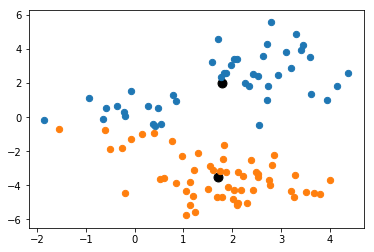

In [31]:
'''

PLOT RESULTS

'''
plt.scatter(centroids[:,0],centroids[:,1],s = 80, c='black')
for i in range(len(centroids)):
    cluster = X[assignments == i]
    plt.scatter(cluster[:,0],cluster[:,1],s = 40)

## 3. Run your algorithm for $k$ = 2, 3, 4 and 5. 

<div class="alert alert-info">
In each case, plot the data using a different symbol for each cluster.
</fiv>

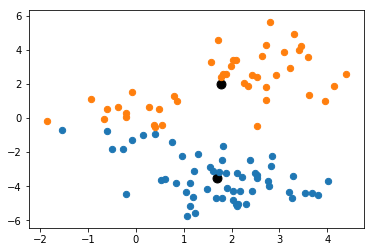

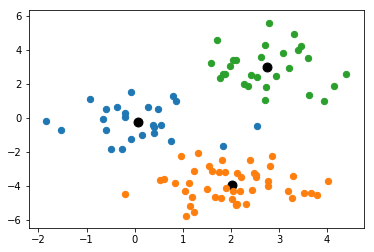

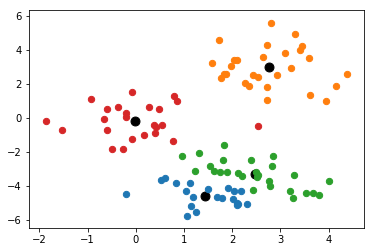

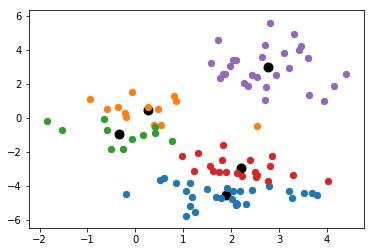

In [36]:
for k in range(2,6):
    centroids , assignments = kmeans(X,50,k)

    plt.scatter(centroids[:,0],centroids[:,1],s = 80, c='black')
    for i in range(len(centroids)):
        cluster = X[assignments == i]
        plt.scatter(cluster[:,0],cluster[:,1],s = 40)
    plt.show()